# Example 3 - Investigating the Effects of Stress Drop

First, we will import necessary modules and arrange the working directory.

In [1]:
import os
os.chdir('C:\\Users\\abdul\\Desktop\\Ders\\Python\\pyexsim12')

import pyexsim12 as pex
import matplotlib.pyplot as plt
import numpy as np

Next, we will write a function to create a Simulation object with the input stress drop value (Similar to example 2, where kappa was the input). Rest of the inputs will be the same as the first example (ex1-visualize_inputs.ipynb), and will be hard-coded into the function.

In [2]:
def create_sim(stress_drop, stem):
    """ Create a simulation object with the input stress_drop value """
    # %% Creating the Source object
    src_spec = pex.SourceSpec(mw=7.0, stress_drop=stress_drop, kappa=0.03)  # kappa_flag = 1 by default, so no need to change anything
    fault_geom = pex.FaultGeom(fault_edge=(0, 0),
                               angles=[180.0, 90.0, 5.0],
                               fault_type="S",
                               len_width=[65.0, 25.0, 5.0, 5.0, 70.0])
    hypo = pex.Hypocenter(hypo_along_fault=-1, hypo_down_dip=-1)  # Random hypocenter
    rupture = pex.Rupture(vrup_beta=0.8, slip_weights="slip_weights.txt")
    src = pex.Source(src_spec, fault_geom, hypo, rupture)

    # %% Creating the Path object

    time_pads = pex.TimePads(tpad1=20.0, tpad2=20.0, delta_t=0.01)
    crust = pex.Crust(beta=3.7, rho=2.8)
    geom_spread = pex.GeometricSpreading(n_seg=3, spread=[(1.0, -1.0), (30.0, -0.6), (50.0, -0.5)])
    q_factor = pex.QualityFactor(q_min=0.0, q_zero=88, eta=0.9)
    path_dur = pex.PathDuration()  # No input is provided as the default values will be used
    path = pex.Path(time_pads, crust, geom_spread, q_factor, path_dur)

    amp = pex.Amplification(site_amp="site_amp_tutorial.txt", crustal_amp="crustal_amp_tutorial.txt")

    misc = pex.Misc(stem=stem, inputs_filename=f"{stem}.in")
    # Only one site will be used for demonstration (at 5 km distance, 30 degrees)
    sites = pex.Sites([(5, 30)], site_coord_flag=2)  
    sim = pex.Simulation(src, path, amp, misc, sites)
    return sim

Now, we will create three Simulation objects with three different stress drop values: 100, 200, 300.
Next, we will create the input files (```sim.create_input_file()```) and run the simulations (```sim.run()```).

In [3]:
sim1 = create_sim(stress_drop=100, stem="sim1_ex3")
sim2 = create_sim(stress_drop=200, stem="sim2_ex3")
sim3 = create_sim(stress_drop=300, stem="sim3_ex3")

sim1.create_input_file()
sim2.create_input_file()
sim3.create_input_file()

sim1.run()
sim2.run()
sim3.run()

C:\Users\abdul\Desktop\Ders\Python\pyexsim12\pyexsim12\simulation.py:409: UserWarning: The simulation has been run before. To override previous results, set override=True while calling the Simulation.run() method
  warnings.warn("The simulation has been run before. To override previous results, set "


Now we will create a figure with 3 panels, and plot the simulated accelerograms.

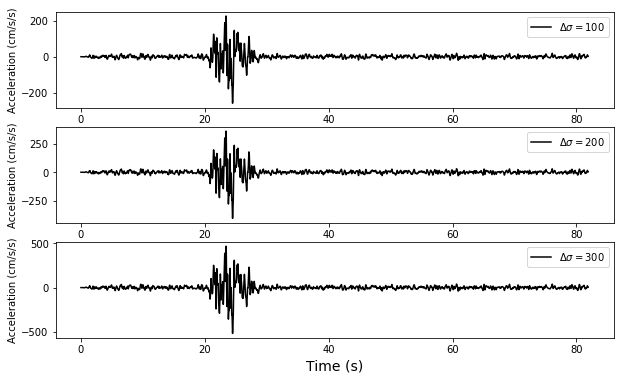

In [4]:
sims = [sim1, sim2, sim3]  # Create a list from the three sim objects to loop over
stress_drop_vals = [100, 200, 300]  # Create a lsit of stress_drop values to loop over

fig_acc, axs_acc = plt.subplots(nrows=3, ncols=1, figsize=(10, 6))

for (sim, stress_drop, ax) in zip(sims, stress_drop_vals, axs_acc):  # Loop over sims, stress_drop_vals, and axs_acc
    sim.plot_acc(site=1, axis=ax, plot_dict={"color": "black", "label": f"$\Delta\sigma={stress_drop}$"})
    ax.legend()
    ax.set_xlabel("Time (s)", fontsize=14)
    ax.set_ylabel("Acceleration (cm/s/s)", fontsize=10)

Next, we will plot the response spectrum of the simulated motions. This time, we will plot all three spectra on the same axis to see the difference.

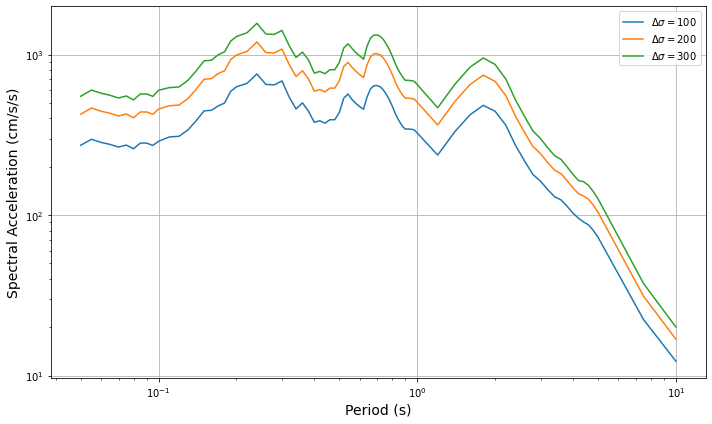

In [5]:
fig_rp, axs_rp = plt.subplots(figsize=(10, 6))
for (sim, stress_drop) in zip(sims, stress_drop_vals):
    sim.plot_rp(site=1, axis=axs_rp, plot_dict={"label": f"$\Delta\sigma={stress_drop}$"})

axs_rp.legend()
axs_rp.set_xscale("log")
axs_rp.set_yscale("log")
axs_rp.grid()
axs_rp.set_xlabel("Period (s)", fontsize=14)
axs_rp.set_ylabel("Spectral Acceleration (cm/s/s)", fontsize=14)
plt.tight_layout()

Finally, we will plot the Fourier amplitude spectra of the three simulated motions.

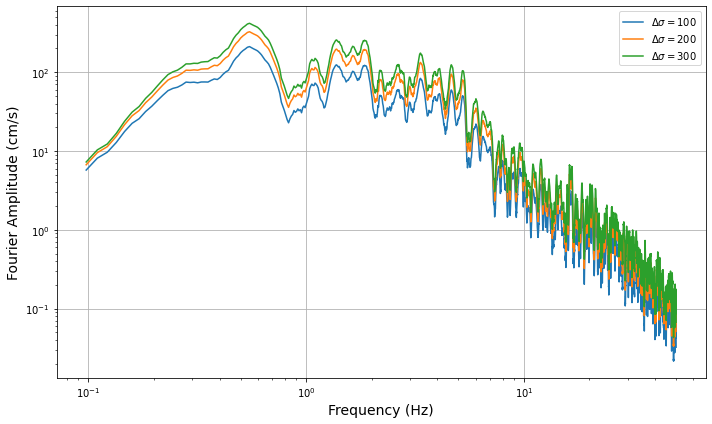

In [6]:
fig_fas, axs_fas = plt.subplots(figsize=(10, 6))
for (sim, stress_drop) in zip(sims, stress_drop_vals):
    sim.plot_fas(site=1, axis=axs_fas, plot_dict={"label": f"$\Delta\sigma={stress_drop}$"})

axs_fas.legend()
axs_fas.set_xscale("log")
axs_fas.set_yscale("log")
axs_fas.grid()
axs_fas.set_xlabel("Frequency (Hz)", fontsize=14)
axs_fas.set_ylabel("Fourier Amplitude (cm/s)", fontsize=14)
plt.tight_layout()